In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [360]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [361]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [362]:
dictionary = {}

for column in df:
    dictionary[column] = df[column].isna().sum()
dictionary

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 259,
 'LotArea': 0,
 'Street': 0,
 'Alley': 1369,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 38,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fir

### Delete the columns where more than 80% values are NAN i.e. > ~ 1100

In [363]:
for key, val in dictionary.items():
    if(val > 1100):
        print(key)
        del df[key]

Alley
PoolQC
Fence
MiscFeature


In [364]:
df.shape

(1460, 77)

### separating the date columns to replace them with calculated attributed which would add more value to the model

In [365]:
date_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [366]:
categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
                       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',  'HeatingQC', 'CentralAir', 'Electrical',
                       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
                       'MoSold','SaleType', 'SaleCondition']

In [367]:
continuous_columns= ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', ]

------------- MSSubClass ------------------------


C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


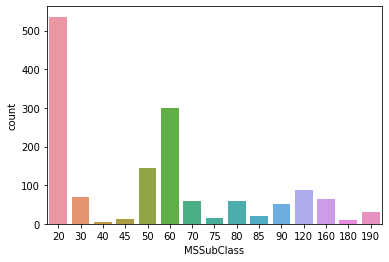

------------- MSZoning ------------------------


C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


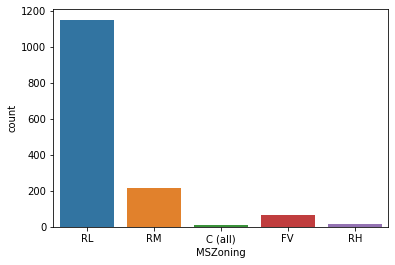

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- Street ------------------------


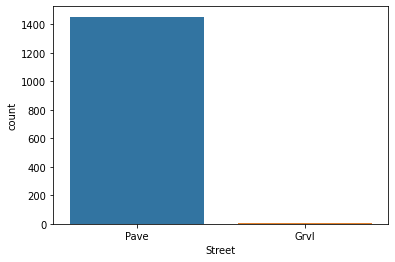

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- LotShape ------------------------


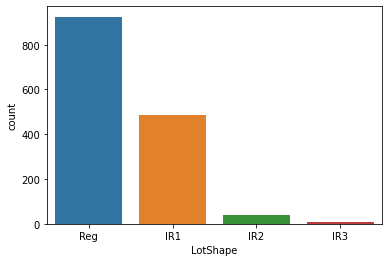

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- LandContour ------------------------


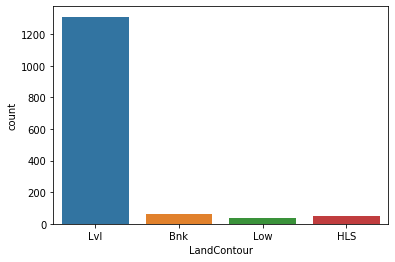

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- Utilities ------------------------


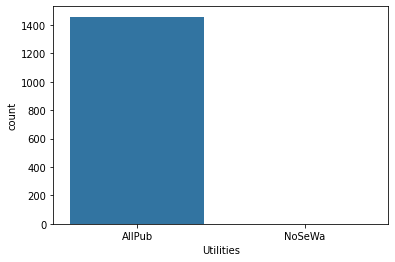

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- LotConfig ------------------------


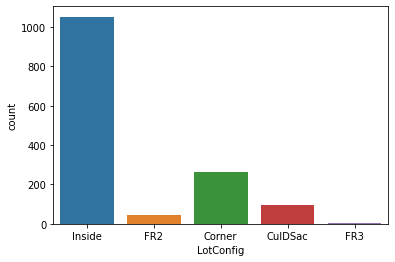

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- LandSlope ------------------------


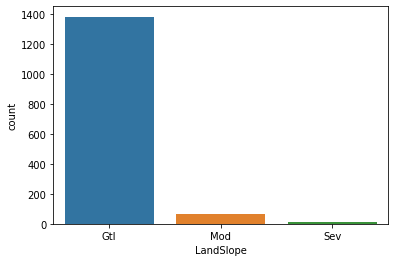

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- Neighborhood ------------------------


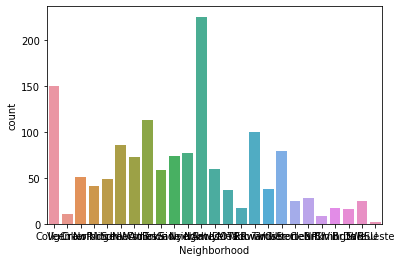

------------- Condition1 ------------------------


C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


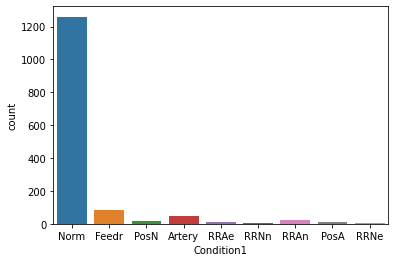

------------- Condition2 ------------------------


C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


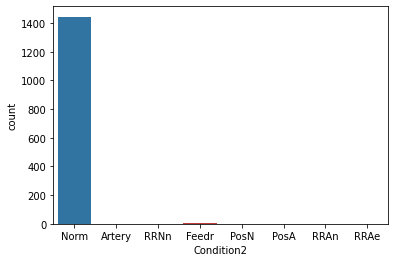

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- BldgType ------------------------


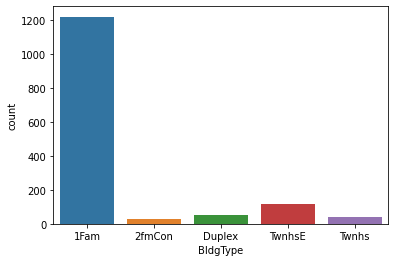

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- HouseStyle ------------------------


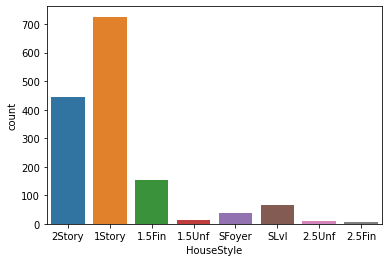

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- OverallQual ------------------------


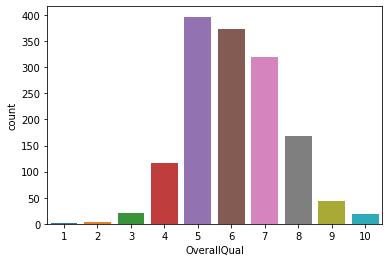

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- OverallCond ------------------------


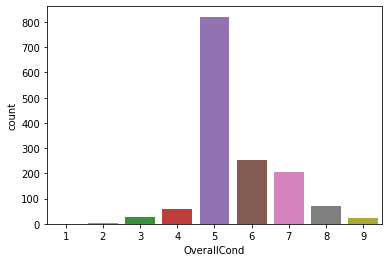

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- RoofStyle ------------------------


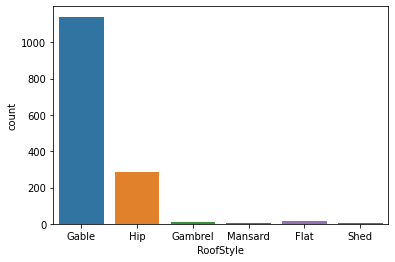

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- RoofMatl ------------------------


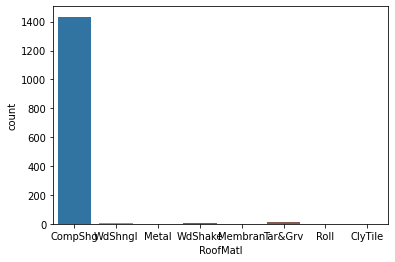

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- Exterior1st ------------------------


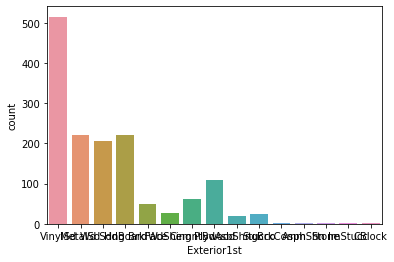

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- Exterior2nd ------------------------


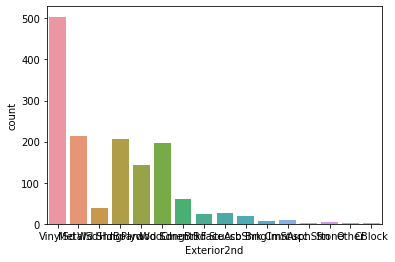

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- MasVnrType ------------------------


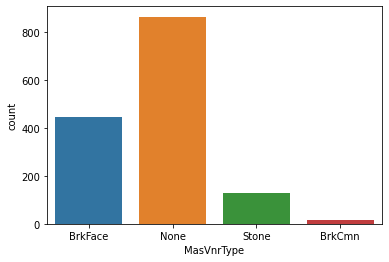

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- ExterQual ------------------------


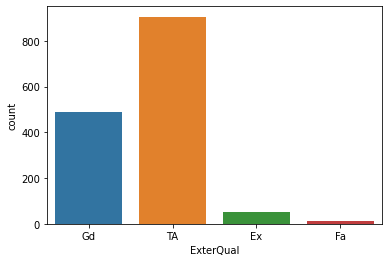

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- ExterCond ------------------------


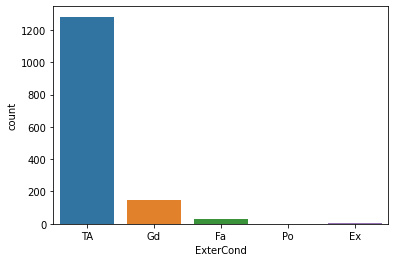

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- Foundation ------------------------


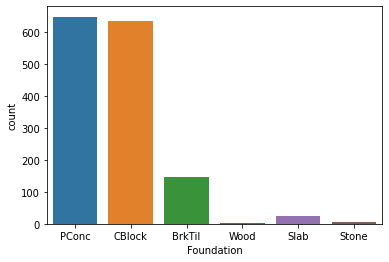

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- BsmtQual ------------------------


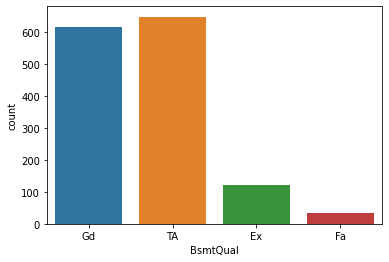

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- BsmtCond ------------------------


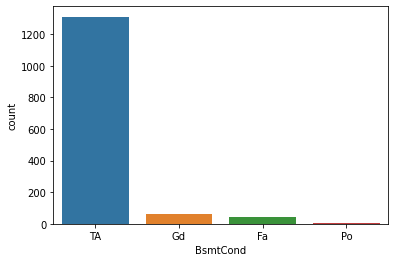

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- BsmtExposure ------------------------


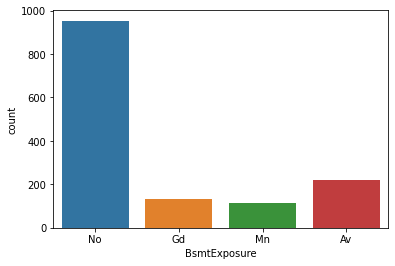

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- BsmtFinType1 ------------------------


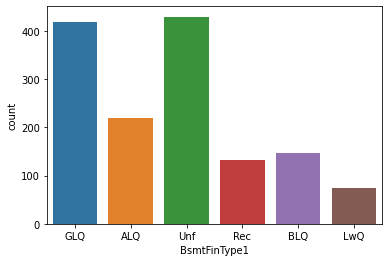

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- BsmtFinType2 ------------------------


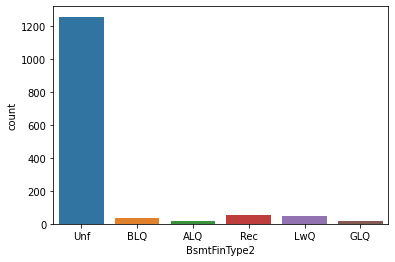

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- Heating ------------------------


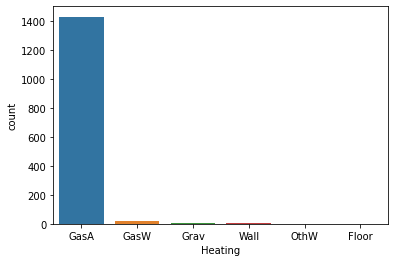

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- HeatingQC ------------------------


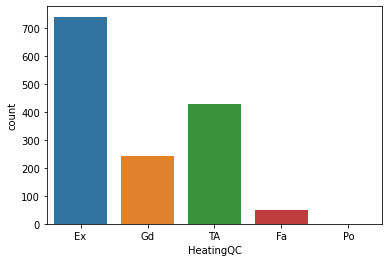

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- CentralAir ------------------------


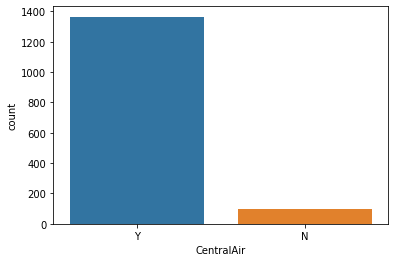

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- Electrical ------------------------


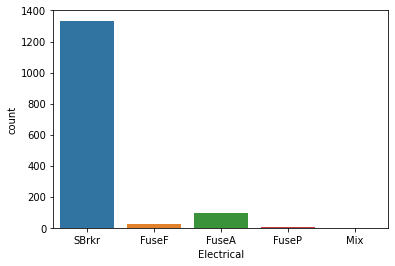

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- KitchenQual ------------------------


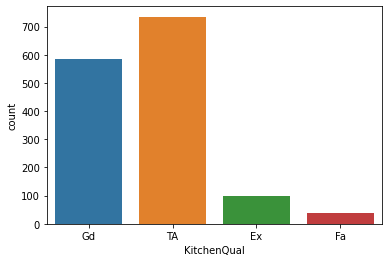

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- Functional ------------------------


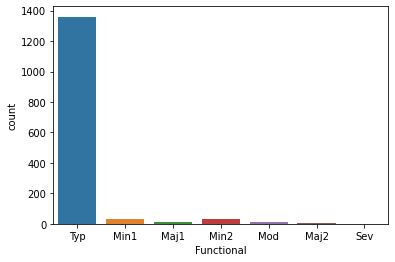

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- FireplaceQu ------------------------


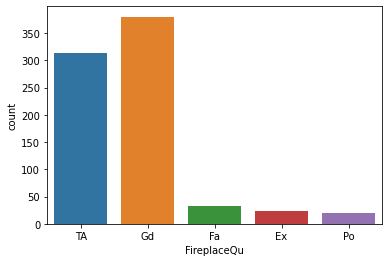

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- GarageType ------------------------


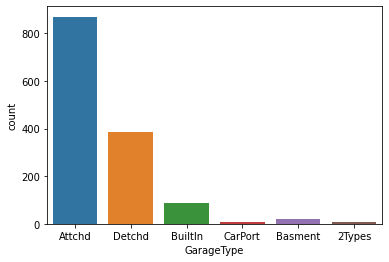

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- GarageFinish ------------------------


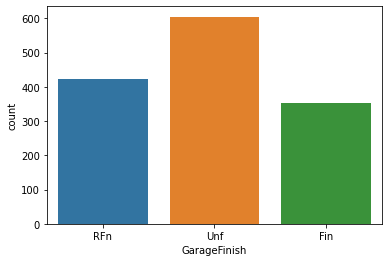

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- GarageQual ------------------------


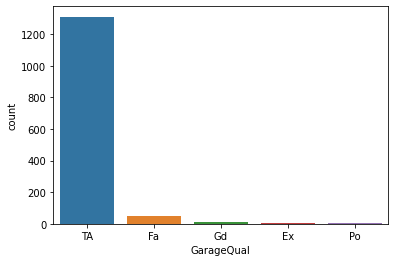

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- GarageCond ------------------------


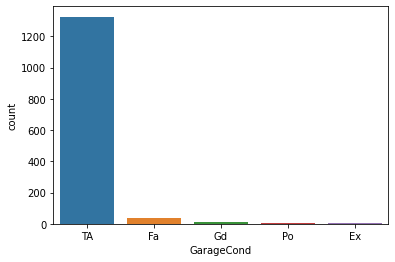

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- PavedDrive ------------------------


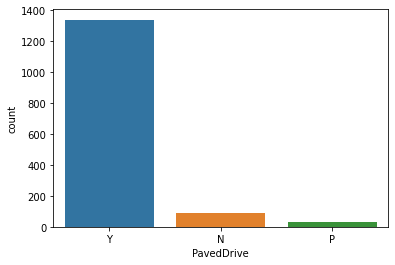

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- MoSold ------------------------


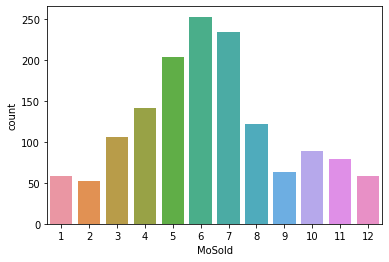

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- SaleType ------------------------


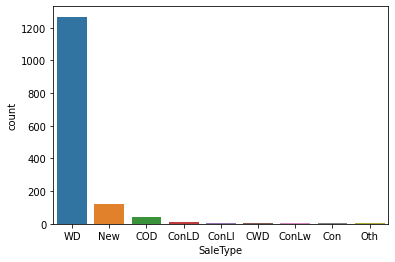

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- SaleCondition ------------------------


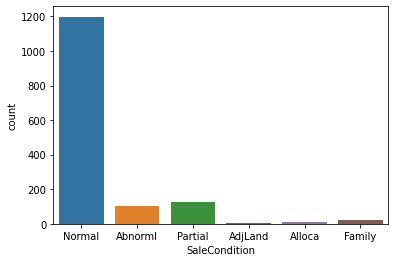

In [368]:
for i in categorical_columns:
    print("-------------", i, "------------------------")
    sns.countplot(df[i])
    plt.show()

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- LotFrontage ------------------------


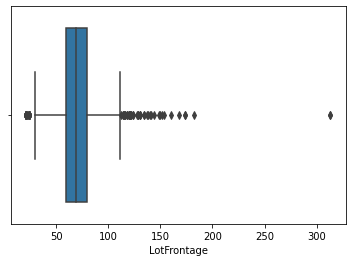

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- LotArea ------------------------


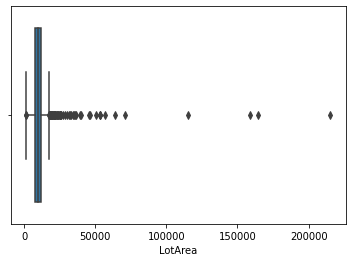

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- MasVnrArea ------------------------


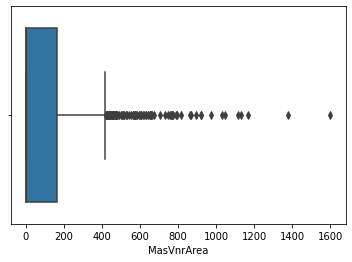

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- BsmtFinSF1 ------------------------


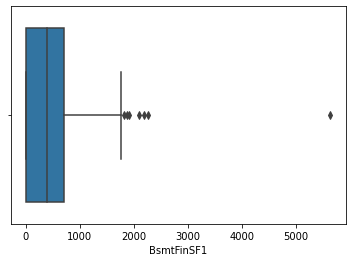

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- BsmtFinSF2 ------------------------


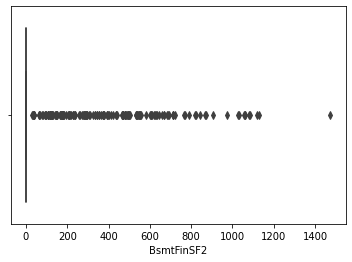

------------- BsmtUnfSF ------------------------


C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


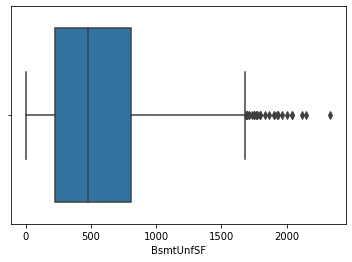

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- TotalBsmtSF ------------------------


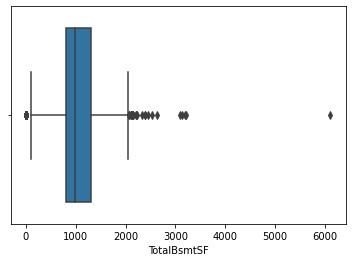

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- 1stFlrSF ------------------------


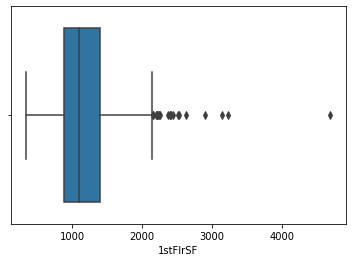

------------- 2ndFlrSF ------------------------


C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


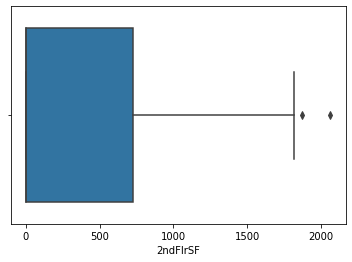

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- LowQualFinSF ------------------------


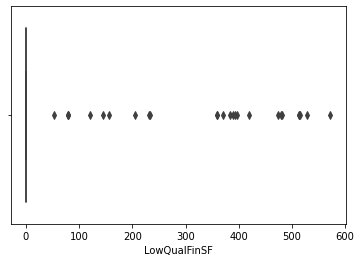

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- GrLivArea ------------------------


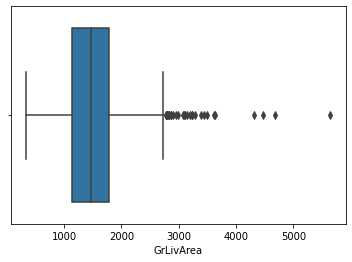

------------- BsmtFullBath ------------------------


C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


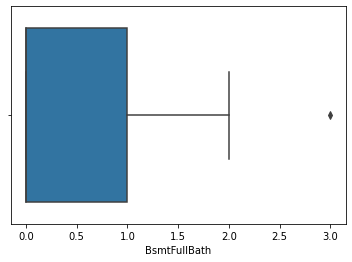

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- BsmtHalfBath ------------------------


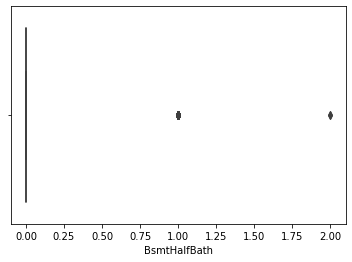

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- FullBath ------------------------


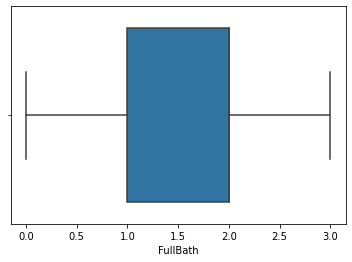

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- HalfBath ------------------------


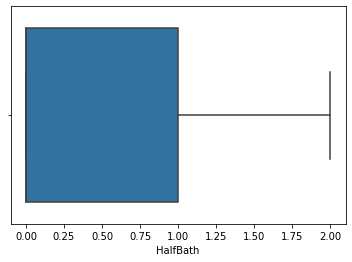

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- BedroomAbvGr ------------------------


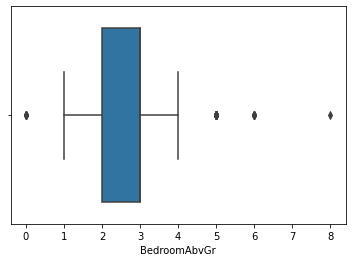

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- KitchenAbvGr ------------------------


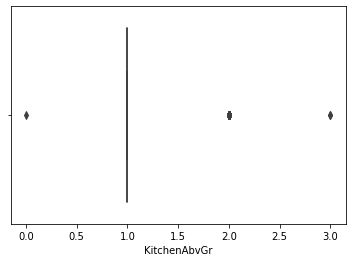

------------- TotRmsAbvGrd ------------------------


C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


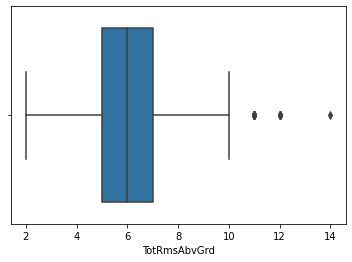

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- Fireplaces ------------------------


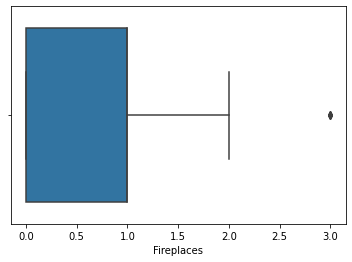

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- GarageCars ------------------------


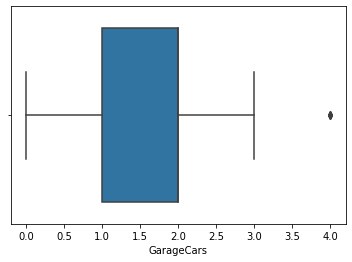

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- GarageArea ------------------------


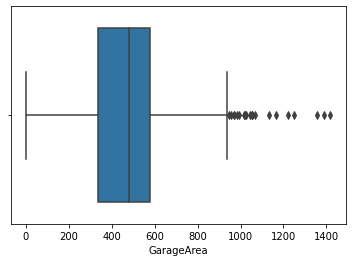

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- WoodDeckSF ------------------------


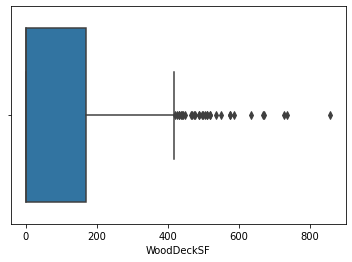

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- OpenPorchSF ------------------------


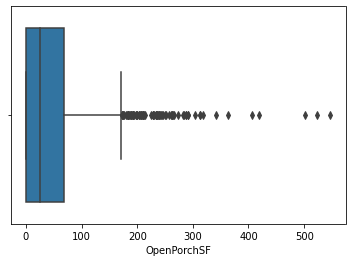

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- EnclosedPorch ------------------------


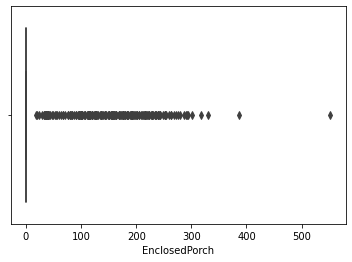

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- 3SsnPorch ------------------------


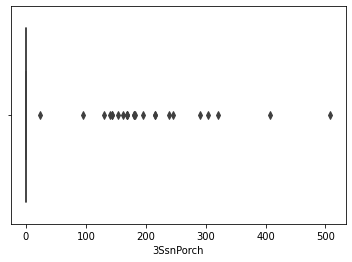

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- ScreenPorch ------------------------


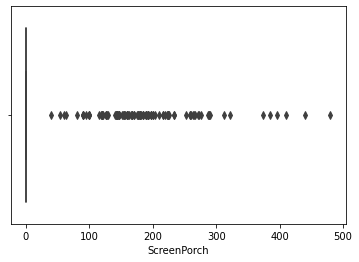

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- PoolArea ------------------------


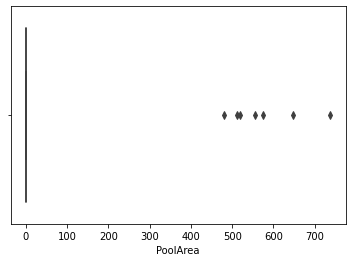

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


------------- MiscVal ------------------------


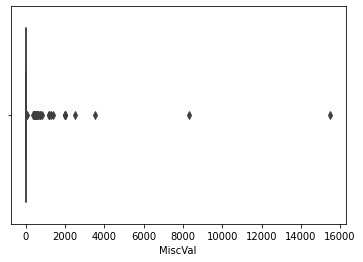

In [369]:
for i in continuous_columns:
    print("-------------", i, "------------------------")
    sns.boxplot(df[i])
    plt.show()

## Using PairPlot lets analyse if there is any relationship between continuous variables


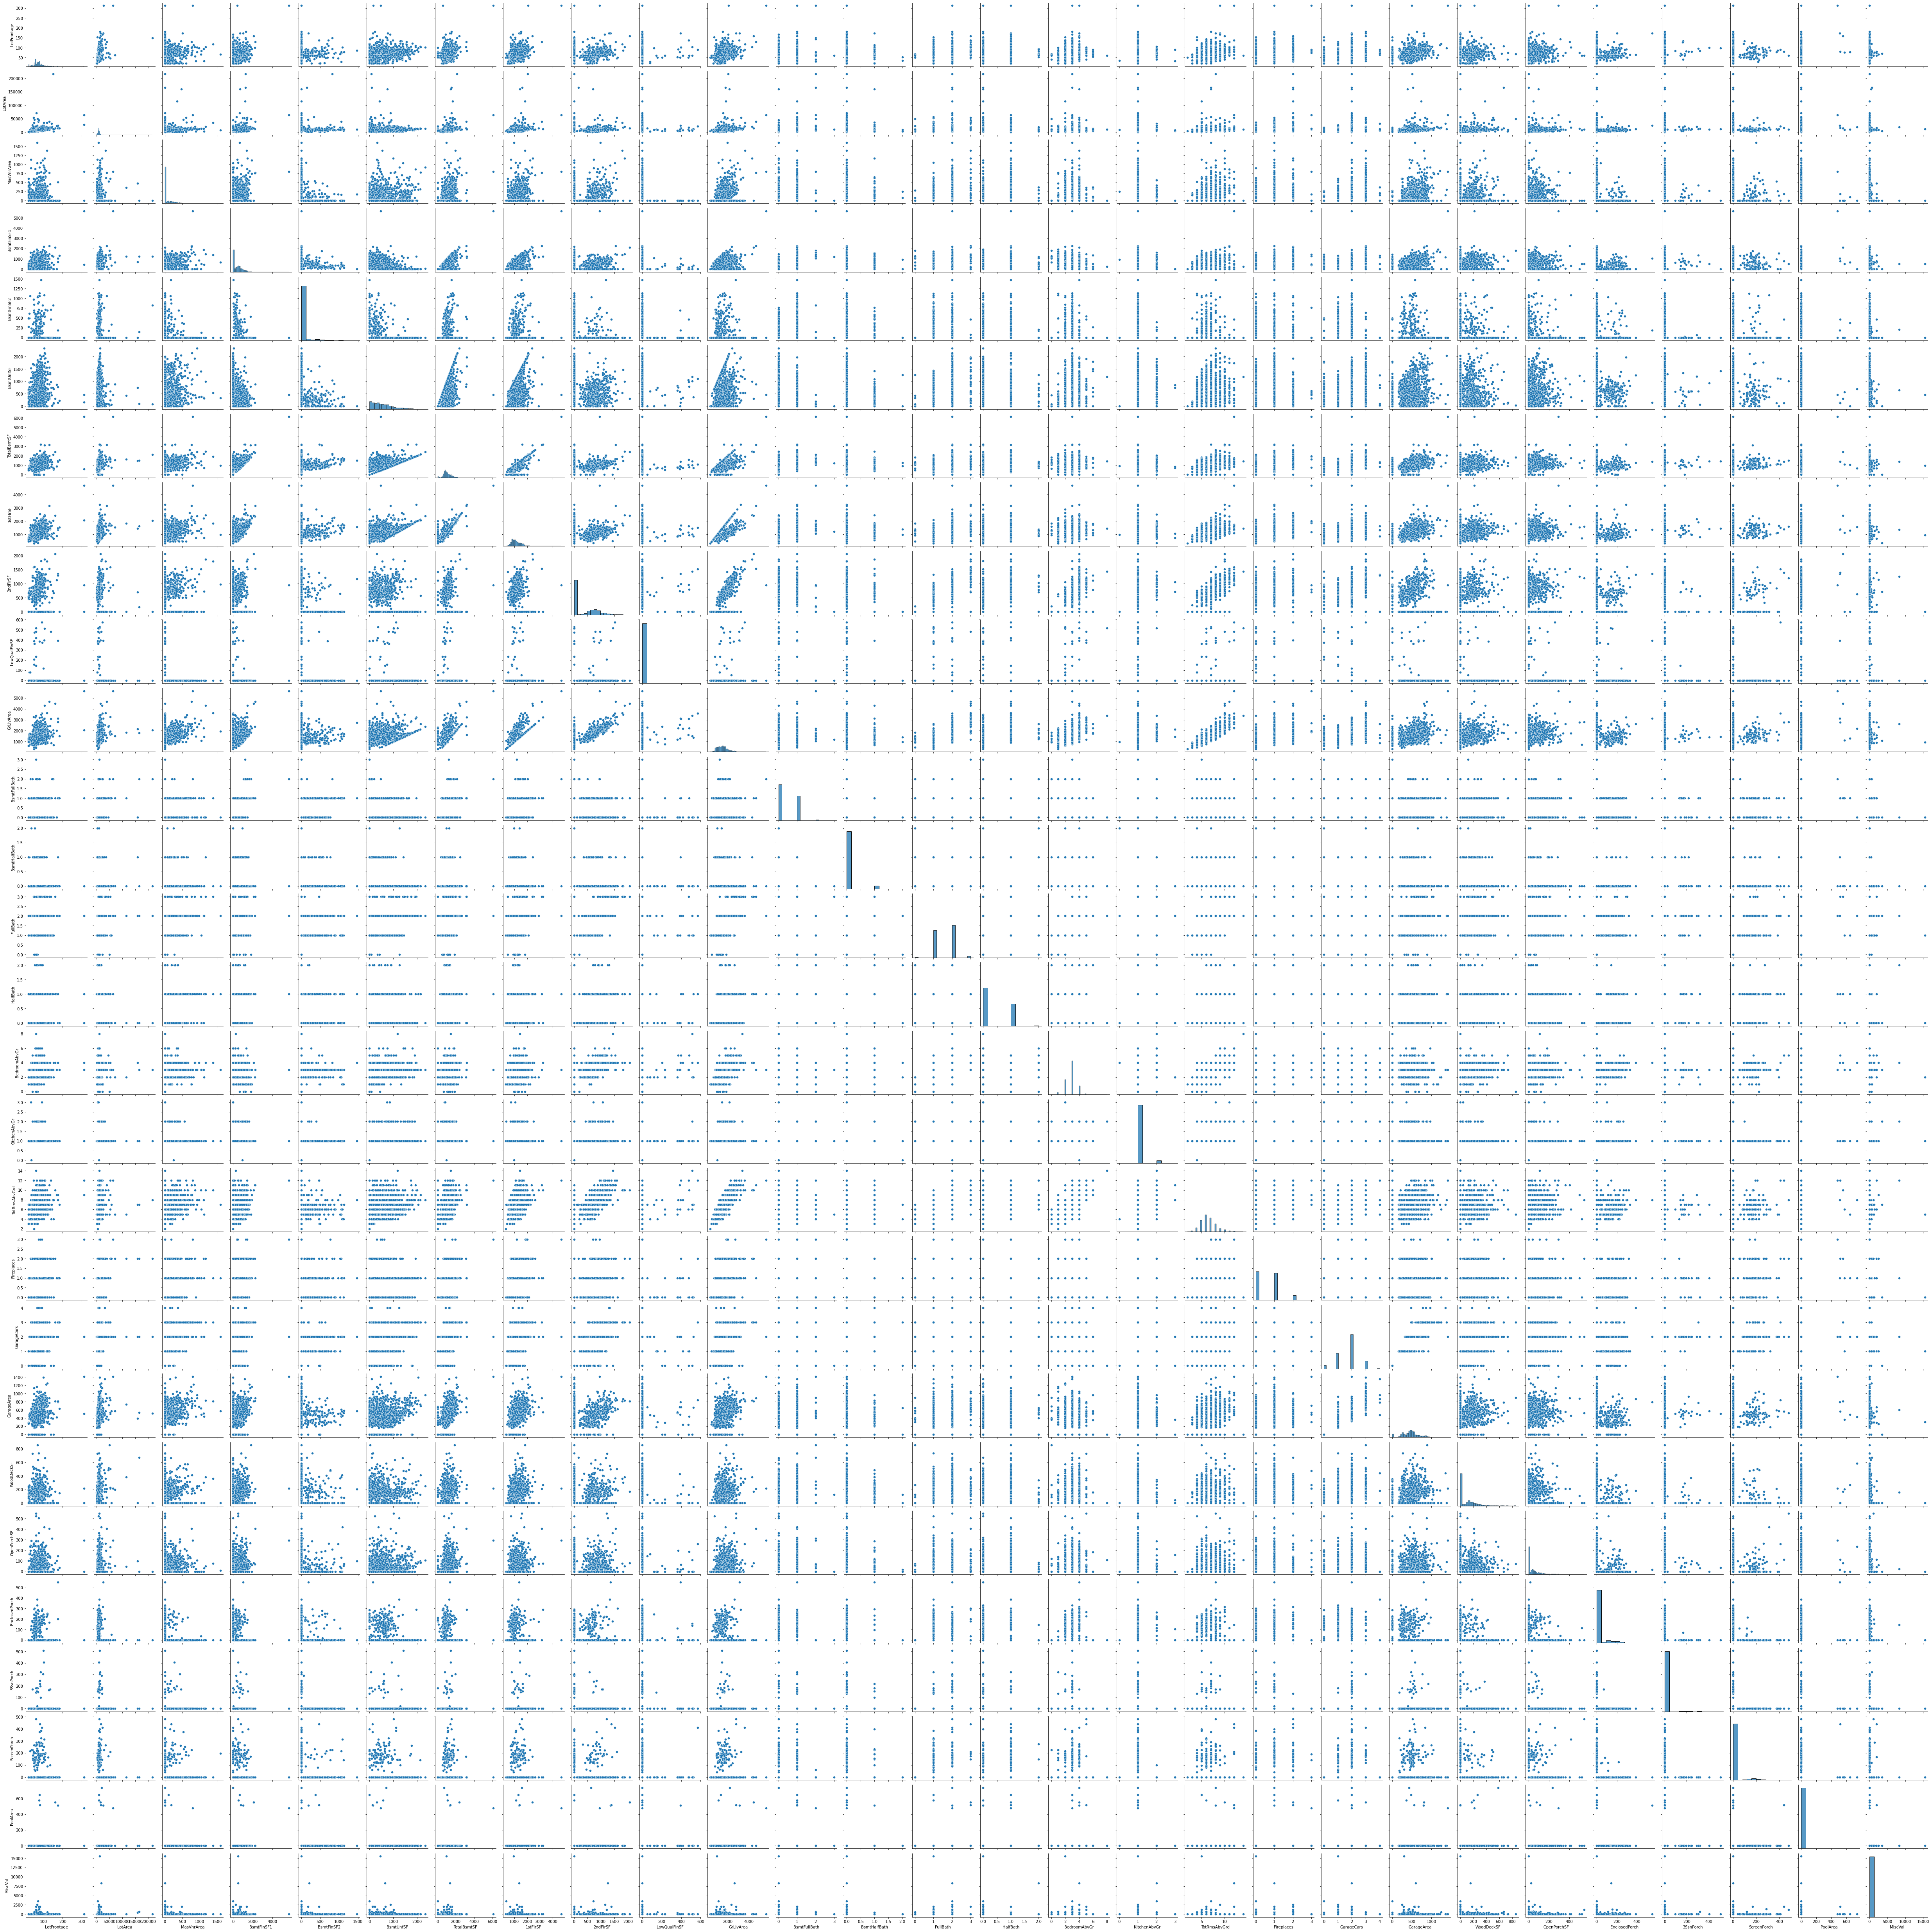

In [370]:
sns.pairplot(df[continuous_columns])

In [371]:
cor = df.corr()
cor

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

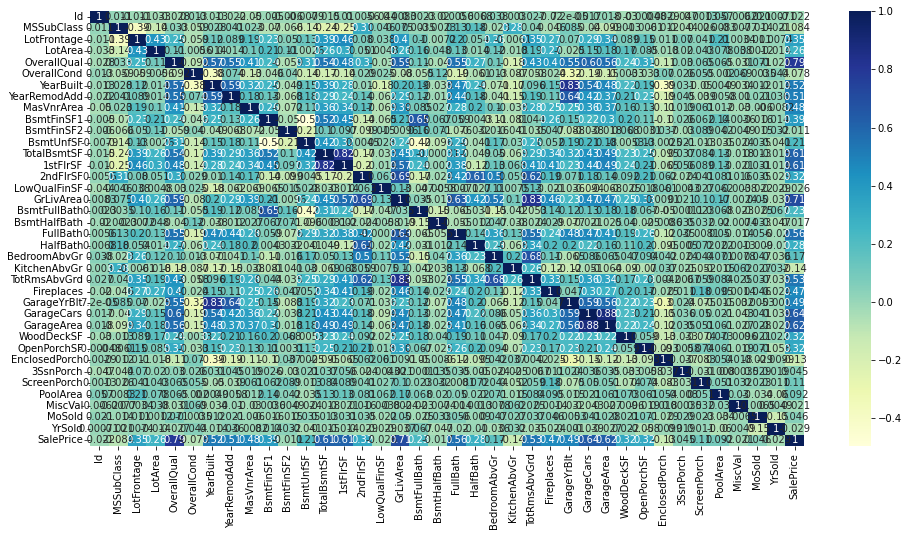

In [372]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


### lets analyse categorical variables

In [373]:
def categorical_info(col):
    return df[col].astype('category').value_counts()

for col in categorical_columns:
    print("***** " + col + " *********" )
    print(categorical_info(col))
    print("*************************\n")

***** MSSubClass *********
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
*************************

***** MSZoning *********
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
*************************

***** Street *********
Pave    1454
Grvl       6
Name: Street, dtype: int64
*************************

***** LotShape *********
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
*************************

***** LandContour *********
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
*************************

***** Utilities *********
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
*************************

***** LotConfig *********
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: L

###  Column - "Utilities" has All records in AllPub category except one record in NoSeWa. Deleting this column as it is too insignificant for the Model.

In [374]:
df.drop(['Utilities'], axis = 1, inplace = True)

### Column- "Condition2" has 99% of the records in "Norm" category. Deleting this columns as its too insignificant

In [375]:
df.drop(['Condition2'], axis = 1, inplace = True)

### Columns - "RoofMatl" has 98% of the records in CompShg category. Deleting this column as its too insignificant

In [376]:
df.drop(['RoofMatl'], axis = 1, inplace = True)

### Columns - "Heating" has 98% of the records in CompShg category. Deleting this column as its too insignificant

In [377]:
df.drop(['Heating'], axis = 1, inplace = True)

### imputation

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

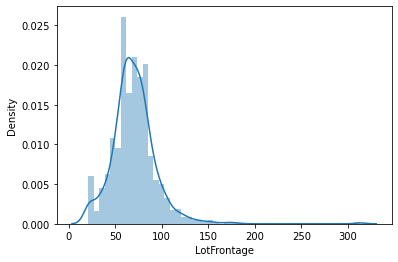

In [378]:
sns.distplot(df['LotFrontage'])


### The data in LotFrontage column looks normally distributed, so the missing values can be substituted with the mean value.

In [379]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)

### imputing missing values in column - MasVnrArea

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

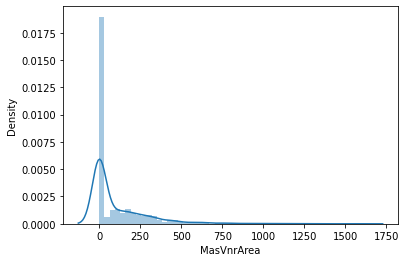

In [380]:
sns.distplot(df['MasVnrArea'])


### the data is not normally distributed and is skewed towards the right with outliers. Substituting the na with Median

In [381]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

In [382]:
missing_val_cat_columns = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
                           'GarageType', 'GarageFinish', 'GarageQual', 'GarageYrBlt','GarageCond', 'Electrical']

In [383]:
def ReplaceMissingValWithMode(col):
    df[col].fillna(df[col].value_counts().index[0],inplace=True)
    
for col in missing_val_cat_columns:
    ReplaceMissingValWithMode(col)

In [384]:
for col in missing_val_cat_columns:
    print("missing values in column ", col, " are ",df[col].isna().sum())

missing values in column  MasVnrType  are  0
missing values in column  BsmtQual  are  0
missing values in column  BsmtCond  are  0
missing values in column  BsmtExposure  are  0
missing values in column  BsmtFinType1  are  0
missing values in column  BsmtFinType2  are  0
missing values in column  FireplaceQu  are  0
missing values in column  GarageType  are  0
missing values in column  GarageFinish  are  0
missing values in column  GarageQual  are  0
missing values in column  GarageYrBlt  are  0
missing values in column  GarageCond  are  0
missing values in column  Electrical  are  0


In [385]:
dictionary = {}
for column in df:
    dictionary[column] = df[column].isna().sum()
dictionary

{'Id': 0,
 'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 0,
 'LotArea': 0,
 'Street': 0,
 'LotShape': 0,
 'LandContour': 0,
 'LotConfig': 0,
 'LandSlope': 0,
 'Neighborhood': 0,
 'Condition1': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'YearBuilt': 0,
 'YearRemodAdd': 0,
 'RoofStyle': 0,
 'Exterior1st': 0,
 'Exterior2nd': 0,
 'MasVnrType': 0,
 'MasVnrArea': 0,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 0,
 'BsmtQual': 0,
 'BsmtCond': 0,
 'BsmtExposure': 0,
 'BsmtFinType1': 0,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 0,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 0,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 0,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 0,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fireplaces': 0,
 'FireplaceQu': 0,
 'GarageType': 0,
 'GarageYrBlt': 0,
 'GarageFinish': 0,


## Calculated columns
### The difference between YearBuilt and YrSold will give the property age which looks more relevant as just the years will not add value to the model
### The difference between YearRemodAdd and YrSold will give the Duration of the last modification to the propery whereas YearRemodAdd would not add any value independently
### The difference between GarageYrBlt and YrSold will give the Garage age whereas GarageYrBlt would not add any value independently

In [386]:
df['PropertyAge'] =  (df['YrSold'])-(df['YearBuilt'] )

In [387]:
df['ModificationAge'] =  (df['YrSold'])-(df['YearRemodAdd'] )

In [388]:
df['GarageAge'] =  (df['YrSold'])-(df['GarageYrBlt'] )

In [389]:
df.drop(['YrSold'], axis = 1, inplace = True)
df.drop(['YearBuilt'], axis = 1, inplace = True)
df.drop(['YearRemodAdd'], axis = 1, inplace = True)
df.drop(['GarageYrBlt'], axis = 1, inplace = True)

### column - MSSubClass should be a categorical column as it has just 16 distict values which are not continous in nature
Checking the Dtype first

In [390]:
df['MSSubClass'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MSSubClass
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [391]:
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['MSSubClass'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MSSubClass
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [392]:
def SubstituteMSSubClass(x):
    if(x==20):
        return "1-STORY-1946"
    elif(x==30):
        return "1-STORY-1945"
    elif(x==40):
        return "1-STORY-WFINISHED"
    elif(x==45):
        return "1-1/2-STORY-UNFINISHED"
    elif(x==50):
        return "1-1/2-STORY-FINISHED"
    elif(x==60):
        return "2-STORY-1946"
    elif(x==70):
        return "2-STORY-1945"
    elif(x==75):
        return "2-1/2-STORY"
    elif(x==80):
        return "SPLIT-OR-MULTI-LEVEL"
    elif(x==85):
        return "SPLIT-FOYER"
    elif(x==90):
        return "DUPLEX"
    elif(x==120):
        return "1-STORY-PUD"
    elif(x==150):
        return "1-1/2-STORY-PUD"
    elif(x==160):
        return "2-STORY-PUD"
    elif(x==180):
        return "PUD-MULTILEVEL"
    elif(x==190):
        return "2-FAMILY-CONVERSION"
        
        

In [393]:
df['MSSubClass'] = df['MSSubClass'].apply(SubstituteMSSubClass)

In [394]:
df['MSSubClass'].astype('category').value_counts()

1-STORY-1946              536
2-STORY-1946              299
1-1/2-STORY-FINISHED      144
1-STORY-PUD                87
1-STORY-1945               69
2-STORY-PUD                63
2-STORY-1945               60
SPLIT-OR-MULTI-LEVEL       58
DUPLEX                     52
2-FAMILY-CONVERSION        30
SPLIT-FOYER                20
2-1/2-STORY                16
1-1/2-STORY-UNFINISHED     12
PUD-MULTILEVEL             10
1-STORY-WFINISHED           4
Name: MSSubClass, dtype: int64

### Change columns OverallQual and OverallCond to categorical columns

In [395]:
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')

In [396]:
def SubstituteRatings(x):
    if(x==10):
        return "VeryExcellent"
    elif(x==9):
        return "Excellent"
    elif(x==8):
        return "VeryGood"
    elif(x==7):
        return "Good"
    elif(x==6):
        return "AboveAverage"
    elif(x==5):
        return "Average"
    elif(x==4):
        return "BelowAverage"
    elif(x==3):
        return "Fair"
    elif(x==2):
        return "Poor"
    elif(x==1):
        return "VeryPoor"

In [397]:
df['OverallQual'] = df['OverallQual'].apply(SubstituteRatings)
df['OverallCond'] = df['OverallCond'].apply(SubstituteRatings)

In [398]:
df['OverallQual'].astype('category').value_counts()

Average          397
AboveAverage     374
Good             319
VeryGood         168
BelowAverage     116
Excellent         43
Fair              20
VeryExcellent     18
Poor               3
VeryPoor           2
Name: OverallQual, dtype: int64

In [399]:
df['OverallCond'].astype('category').value_counts()

Average         821
AboveAverage    252
Good            205
VeryGood         72
BelowAverage     57
Fair             25
Excellent        22
Poor              5
VeryPoor          1
Name: OverallCond, dtype: int64

## Data Preparation

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1460 non-null   int64  
 1   MSSubClass       1460 non-null   object 
 2   MSZoning         1460 non-null   object 
 3   LotFrontage      1460 non-null   float64
 4   LotArea          1460 non-null   int64  
 5   Street           1460 non-null   object 
 6   LotShape         1460 non-null   object 
 7   LandContour      1460 non-null   object 
 8   LotConfig        1460 non-null   object 
 9   LandSlope        1460 non-null   object 
 10  Neighborhood     1460 non-null   object 
 11  Condition1       1460 non-null   object 
 12  BldgType         1460 non-null   object 
 13  HouseStyle       1460 non-null   object 
 14  OverallQual      1460 non-null   object 
 15  OverallCond      1460 non-null   object 
 16  RoofStyle        1460 non-null   object 
 17  Exterior1st   

In [401]:
final_categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
                       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
                        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
                       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
                       'MoSold','SaleType', 'SaleCondition']


In [402]:
final_continuous_columns= ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                    'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','PropertyAge' ,'ModificationAge','GarageAge']

In [403]:
# Setting X as list of Feature variables
X = df.loc[:,final_categorical_columns + final_continuous_columns]

In [404]:
# Storing target variable - "SalePrice" in y
y = df['SalePrice']

In [405]:
df_categorical = X[final_categorical_columns]
df_categorical.head()

MSSubClass MSZoning Street LotShape LandContour LotConfig LandSlope  \
0  2-STORY-1946       RL   Pave      Reg         Lvl    Inside       Gtl   
1  1-STORY-1946       RL   Pave      Reg         Lvl       FR2       Gtl   
2  2-STORY-1946       RL   Pave      IR1         Lvl    Inside       Gtl   
3  2-STORY-1945       RL   Pave      IR1         Lvl    Corner       Gtl   
4  2-STORY-1946       RL   Pave      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 BldgType  ... Functional FireplaceQu GarageType  \
0      CollgCr       Norm     1Fam  ...        Typ          Gd     Attchd   
1      Veenker      Feedr     1Fam  ...        Typ          TA     Attchd   
2      CollgCr       Norm     1Fam  ...        Typ          TA     Attchd   
3      Crawfor       Norm     1Fam  ...        Typ          Gd     Detchd   
4      NoRidge       Norm     1Fam  ...        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive MoSold SaleType SaleCondition  
0          RFn         TA         TA          Y      2       WD        Normal  
1          RFn         TA         TA          Y      5       WD        Normal  
2          RFn         TA         TA          Y      9       WD        Normal  
3          Unf         TA         TA          Y      2       WD       Abnorml  
4          RFn         TA         TA          Y     12       WD        Normal  

[5 rows x 39 columns]

In [406]:
# converting categorical variable in Dummy variables
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

MoSold  MSSubClass_1-1/2-STORY-UNFINISHED  MSSubClass_1-STORY-1945  \
0       2                                  0                        0   
1       5                                  0                        0   
2       9                                  0                        0   
3       2                                  0                        0   
4      12                                  0                        0   

   MSSubClass_1-STORY-1946  MSSubClass_1-STORY-PUD  \
0                        0                       0   
1                        1                       0   
2                        0                       0   
3                        0                       0   
4                        0                       0   

   MSSubClass_1-STORY-WFINISHED  MSSubClass_2-1/2-STORY  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   MSSubClass_2-FAMILY-CONVERSION  MSSubClass_2-STORY-1945  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        1   
4                               0                        0   

   MSSubClass_2-STORY-1946  ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0                        1  ...               0               0             0   
1                        0  ...               0               0             0   
2                        1  ...               0               0             0   
3                        0  ...               0               0             0   
4                        1  ...               0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 212 columns]

In [407]:
# dropping categorical variables 
X = X.drop(list(df_categorical.columns), axis=1)

In [408]:
# concat dummy variables
X = pd.concat([X, df_dummies], axis=1)

In [409]:
X.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
0          856       856       854             0  ...               0   
1         1262      1262         0             0  ...               0   
2          920       920       866             0  ...               0   
3          756       961       756             0  ...               0   
4         1145      1145      1053             0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 243 columns]

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,
                                                    test_size = 0.3, random_state = 100)

# Model Building and Evaluation

## LInear Regression

In [411]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [412]:
print(lm.intercept_)
print(lm.coef_)

33545.02589508836
[-1.79366442e+02  5.15923942e-01  7.07037300e+00 -4.52834708e+00
  4.45337744e+00  8.39316059e-01  7.64357411e-01  8.09887891e+00
  3.86854549e+01 -1.19814474e+01  3.48028724e+01  8.71059391e+03
  4.75995707e+03  6.74817739e+03  1.49980478e+03  1.41868962e+02
 -1.68200821e+04  7.46991213e+02  2.89790451e+03  1.34722562e+04
 -1.54372431e+01  1.30560950e+01 -7.51638255e+00  2.15635431e+01
  7.82271794e+01  3.58024552e+01 -2.35381516e+01 -2.68939671e-01
 -2.16997647e+02 -7.51485603e+01  4.96572978e+00 -2.04741048e+02
 -9.49367306e+03 -9.45802554e+03 -7.23079599e+03 -2.12573726e+04
 -1.40074458e+04  2.58225842e+03 -8.81943951e+03 -7.75517994e+03
 -1.41632403e+04 -1.79092475e+04 -6.45873598e+03 -1.36077814e+04
 -8.93435178e+03  2.02136887e+03  3.04939387e+04  3.86557911e+04
  3.71485949e+04  3.75752633e+04  1.53146099e+04  5.16502521e+03
 -1.06151312e+04  2.03219201e+03  1.92197486e+04  2.40086642e+04
  2.40120929e+04  7.40535815e+03 -1.47260185e+04 -6.39888472e+03
 -2.738

In [413]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9052805081418671
0.8571201606861609
604376547986.2666
402737193408.3583
591945688.5271955
919491309.151503


### Ridge Regression

In [414]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[final_continuous_columns] =scaler.fit_transform(X_train[final_continuous_columns])
X_test[final_continuous_columns] = scaler.transform(X_test[final_continuous_columns])

In [415]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [416]:
print(model_cv.best_params_)

{'alpha': 20}


In [417]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.56565122e+03  4.15073829e+03  4.43800056e+03 -3.52234060e+01
  1.07328101e+03  1.55210755e+03  1.88041708e+03  6.43822987e+03
  1.52217325e+04 -1.40356211e+03  1.71438501e+04  4.50649508e+03
  8.88035124e+02  4.68392574e+03  1.03640688e+03 -2.18589173e+03
 -5.62572580e+03  2.70533610e+03  3.93217749e+03  9.51633235e+03
 -1.32333599e+03  1.90270138e+03 -4.11969423e+02  9.95773734e+02
  1.69559785e+03  1.50365948e+03 -7.15643151e+02  1.38332984e+01
 -7.05028761e+03 -3.36797079e+03 -1.02211236e+03 -1.57322955e+02
  3.87614429e+03  3.08811676e+02  7.73168355e+03 -5.56574103e+03
  1.34072358e+03 -1.26860710e+02 -2.83736402e+03  3.38738018e+03
 -3.05141489e+03 -8.25544475e+03  9.03558098e+02 -1.97342435e+03
  1.00728335e+03  7.15330006e+02  4.02948471e+03  2.14767126e+03
  5.10918437e+03 -1.35649334e+03  3.69365256e+03  1.93520948e+03
 -7.69738067e+03  9.95225605e+02  7.10179757e+03  5.34612960e+03
  1.04348648e+04  7.77026996e+03 -5.71142240e+03 -9.63609159e+02
 -1.43928816e+03  4.35704

In [418]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8829508117884013
0.8639366265217315
746855614701.5135
383523535744.9307
731494235.7507478
875624510.8331752


### analyse the distribution of error terms and verify is its normally distributed

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

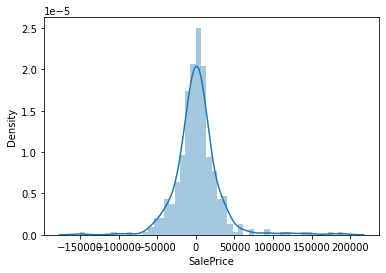

In [419]:
residual = y_test - y_pred_test
sns.distplot(residual)

### Lasso regression

In [420]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.446e+11, tolerance: 5.301e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.814e+11, tolerance: 4.851e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.634e+10, tolerance: 4.884e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.743e+10, tolerance: 5.301e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.777e+10, tolerance: 5.312e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.926e+08, tolerance: 4.884e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e+09, tolerance: 5.312e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.602e+08, tolerance: 4.884e+08
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [421]:
print(model_cv.best_params_)

{'alpha': 100}


In [422]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [423]:
lasso.coef_

array([-2.99241392e+03,  3.84336596e+03,  1.96425108e+03, -0.00000000e+00,
        4.57631676e+02,  2.24325477e+03,  1.62799050e+01,  0.00000000e+00,
        8.27594934e+03, -1.69393254e+03,  2.42535391e+04,  4.85223288e+03,
        9.89601069e+02,  4.04745653e+03,  7.66029670e+02, -6.50027089e+02,
       -4.81708270e+03,  8.22055426e+02,  2.89533231e+03,  8.95144422e+03,
       -1.82462885e+03,  1.47690848e+03, -7.94961632e+02,  9.05767442e+02,
        1.94030436e+03,  1.55196290e+03, -9.79527608e+02,  0.00000000e+00,
       -6.78751411e+03, -3.18393720e+03, -1.98985318e+02, -2.46642841e+02,
        0.00000000e+00, -0.00000000e+00,  6.93058055e+03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.43636724e+03,  0.00000000e+00,
       -1.73037614e+03, -1.73819146e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.72632450e+03, -0.00000000e+00,  0.00000000e+00,  1.17875212e+03,
       -6.02304624e+03,  

C:\ProgramData\Anaconda3\envs\mtcnn\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

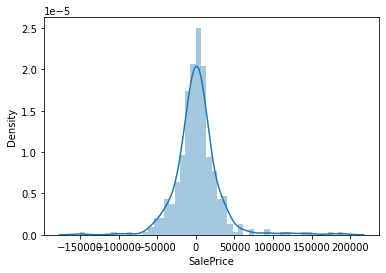

In [424]:
residual = y_test - y_pred_test
sns.distplot(residual)

In [425]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8935619874333544
0.8675436279714167
679148899002.7212
373356435561.7113
665180116.5550648
852411953.3372405


In [426]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.052805e-01      8.829508e-01      8.935620e-01
1   R2 Score (Test)       8.571202e-01      8.639366e-01      8.675436e-01
2       RSS (Train)       6.043765e+11      7.468556e+11      6.791489e+11
3        RSS (Test)       4.027372e+11      3.835235e+11      3.733564e+11
4       MSE (Train)       2.432993e+04      2.704615e+04      2.579109e+04
5        MSE (Test)       3.032312e+04      2.959095e+04      2.919609e+04

In [427]:
betas = pd.DataFrame(index=X.columns)

In [428]:
betas.rows = X.columns

C:\Users\GBhardwaj02\AppData\Local\Temp\ipykernel_32040\3817019565.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X.columns


In [429]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [430]:
pd.set_option('display.max_rows', None)
betas.head(300)

Linear         Ridge         Lasso
LotFrontage                       -1.793664e+02  -2565.651222  -2992.413922
LotArea                            5.159239e-01   4150.738293   3843.365957
MasVnrArea                         7.070373e+00   4438.000560   1964.251085
BsmtFinSF1                        -4.528347e+00    -35.223406     -0.000000
BsmtFinSF2                         4.453377e+00   1073.281011    457.631676
BsmtUnfSF                          8.393161e-01   1552.107553   2243.254774
TotalBsmtSF                        7.643574e-01   1880.417081     16.279905
1stFlrSF                           8.098879e+00   6438.229865      0.000000
2ndFlrSF                           3.868545e+01  15221.732469   8275.949344
LowQualFinSF                      -1.198145e+01  -1403.562113  -1693.932542
GrLivArea                          3.480287e+01  17143.850055  24253.539133
BsmtFullBath                       8.710594e+03   4506.495077   4852.232884
BsmtHalfBath                       4.759957e+03    888.035124    989.601069
FullBath                           6.748177e+03   4683.925738   4047.456531
HalfBath                           1.499805e+03   1036.406876    766.029670
BedroomAbvGr                       1.418690e+02  -2185.891731   -650.027089
KitchenAbvGr                      -1.682008e+04  -5625.725800  -4817.082702
TotRmsAbvGrd                       7.469912e+02   2705.336096    822.055426
Fireplaces                         2.897905e+03   3932.177490   2895.332308
GarageCars                         1.347226e+04   9516.332345   8951.444221
GarageArea                        -1.543724e+01  -1323.335990  -1824.628848
WoodDeckSF                         1.305609e+01   1902.701384   1476.908478
OpenPorchSF                       -7.516383e+00   -411.969423   -794.961632
EnclosedPorch                      2.156354e+01    995.773734    905.767442
3SsnPorch                          7.822718e+01   1695.597848   1940.304364
ScreenPorch                        3.580246e+01   1503.659481   1551.962900
PoolArea                          -2.353815e+01   -715.643151   -979.527608
MiscVal                           -2.689397e-01     13.833298      0.000000
PropertyAge                       -2.169976e+02  -7050.287615  -6787.514105
ModificationAge                   -7.514856e+01  -3367.970791  -3183.937204
GarageAge                          4.965730e+00  -1022.112360   -198.985318
MoSold                            -2.047410e+02   -157.322955   -246.642841
MSSubClass_1-1/2-STORY-UNFINISHED -9.493673e+03   3876.144291      0.000000
MSSubClass_1-STORY-1945           -9.458026e+03    308.811676     -0.000000
MSSubClass_1-STORY-1946           -7.230796e+03   7731.683549   6930.580555
MSSubClass_1-STORY-PUD            -2.125737e+04  -5565.741026     -0.000000
MSSubClass_1-STORY-WFINISHED      -1.400745e+04   1340.723578      0.000000
MSSubClass_2-1/2-STORY             2.582258e+03   -126.860710     -0.000000
MSSubClass_2-FAMILY-CONVERSION    -8.819440e+03  -2837.364018  -1436.367241
MSSubClass_2-STORY-1945           -7.755180e+03   3387.380176      0.000000
MSSubClass_2-STORY-1946           -1.416324e+04  -3051.414893  -1730.376142
MSSubClass_2-STORY-PUD            -1.790925e+04  -8255.444750  -1738.191463
MSSubClass_DUPLEX                 -6.458736e+03    903.558098      0.000000
MSSubClass_PUD-MULTILEVEL         -1.360778e+04  -1973.424349     -0.000000
MSSubClass_SPLIT-FOYER            -8.934352e+03   1007.283350      0.000000
MSSubClass_SPLIT-OR-MULTI-LEVEL    2.021369e+03    715.330006      0.000000
MSZoning_FV                        3.049394e+04   4029.484713      0.000000
MSZoning_RH                        3.865579e+04   2147.671265      0.000000
MSZoning_RL                        3.714859e+04   5109.184373   3726.324499
MSZoning_RM                        3.757526e+04  -1356.493340     -0.000000
Street_Pave                        1.531461e+04   3693.652556      0.000000
LotShape_IR2                       5.165025e+03   1935.209482   1178.752121
LotShape_IR3 

In [431]:
betas.sort_values('Ridge', ascending=False)


Linear         Ridge         Lasso
OverallQual_Excellent              6.539123e+04  25834.563435  64457.353292
Neighborhood_NoRidge               5.138004e+04  22952.041316  40631.540613
OverallQual_VeryExcellent          9.063667e+04  20155.239006  77743.260994
Neighborhood_NridgHt               3.946532e+04  19360.245557  25929.737812
GrLivArea                          3.480287e+01  17143.850055  24253.539133
BsmtExposure_Gd                    1.605562e+04  15514.730610  17369.884512
2ndFlrSF                           3.868545e+01  15221.732469   8275.949344
OverallQual_VeryGood               2.883938e+04  14962.825336  28571.107327
Neighborhood_Crawfor               3.469427e+04  14082.919045  26144.380497
Condition1_Norm                    1.445213e+04  10474.453053  10398.528738
LandContour_Lvl                    2.401209e+04  10434.864810  14246.670089
Functional_Typ                     5.745835e+03  10063.158102  11088.004004
Exterior1st_BrkFace                1.454739e+04  10036.201309  18529.497319
Neighborhood_Somerst               3.155287e+04   9716.663903  19398.696699
GarageCars                         1.347226e+04   9516.332345   8951.444221
Exterior2nd_ImStucc                3.413389e+04   7867.503152  11138.377023
OverallCond_Excellent              1.917772e+04   7806.310510   9787.131681
Neighborhood_StoneBr               2.703102e+04   7789.223482  11548.073421
LotConfig_CulDSac                  7.405358e+03   7770.269958   6857.066458
MSSubClass_1-STORY-1946           -7.230796e+03   7731.683549   6930.580555
BsmtFinType1_GLQ                   1.710356e+03   7210.931754   4749.873794
LandContour_HLS                    1.921975e+04   7101.797568   5953.257133
HouseStyle_1Story                  2.611912e+04   6926.954772   6523.261552
1stFlrSF                           8.098879e+00   6438.229865      0.000000
BsmtCond_TA                        4.606521e+03   5698.619587   4308.377616
MasVnrType_None                    5.944204e+03   5415.894250   2124.925322
LandContour_Low                    2.400866e+04   5346.129603  10990.792402
GarageType_Attchd                  2.743071e+04   5121.487729   4761.755654
MSZoning_RL                        3.714859e+04   5109.184373   3726.324499
SaleType_New                       8.752456e+03   5020.175686   8264.203424
SaleCondition_Partial              8.752456e+03   5020.175686   1643.795718
HouseStyle_1.5Unf                  2.993383e+04   4839.467887   6090.078907
FullBath                           6.748177e+03   4683.925738   4047.456531
Neighborhood_Veenker               1.874223e+04   4646.917640   4555.152883
GarageQual_Gd                      9.686260e+03   4630.229243      0.000000
BsmtFullBath                       8.710594e+03   4506.495077   4852.232884
MasVnrArea                         7.070373e+00   4438.000560   1964.251085
LandSlope_Mod                      7.812938e+03   4357.041898   4040.019436
LotArea                            5.159239e-01   4150.738293   3843.365957
OverallCond_Good                   1.955302e+03   4137.433034   2337.915581
MSZoning_FV                        3.049394e+04   4029.484713      0.000000
Fireplaces                         2.897905e+03   3932.177490   2895.332308
MSSubClass_1-1/2-STORY-UNFINISHED -9.493673e+03   3876.144291      0.000000
Street_Pave                        1.531461e+04   3693.652556      0.000000
OverallCond_VeryGood               6.009881e+03   3543.896747   3095.492755
Condition1_RRAn                    1.206045e+04   3418.614585   3298.881416
MSSubClass_2-STORY-1945           -7.755180e+03   3387.380176      0.000000
Exterior2nd_BrkFace                1.173619e+03   3367.955982      0.000000
GarageCond_TA                     -7.432613e+03   3155.414737   2691.854712
Exterior2nd_VinylSd                1.019852e+04   2931.033289   4039.461457
Neighborhood_BrkSide               2.357351e+03   2890.022756      0.433593
TotRmsAbvGrd                       7.469912e+02   2705.336096    822.055426
SaleType_CWD 

### The Variables which are important in predicting price of the House are:-

OverallQuality - Excellent	
Neighborhood   - NoRidge	
OverallQual    - Very Excellent	
Neighborhood   - Northridge Heights	
GrLivArea	  
BsmtExposure   - Gd	
2ndFlrSF	
OverallQual    - Very Good	
Neighborhood   - Crawford	
Condition1     - Norm	

### The important variable negatively related are:-

Neighborhood - Mitchel	
ExterQual    - TA	
BsmtQual     - TA	
KitchenQual  - TA	
KitchenQual  - Gd	
Neighborhood - Edwards	
BsmtQual     - Gd	

### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?



In [432]:
# Doubling the alpha from 20 to 40 for Ridge regression
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=40)

In [433]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8690638982582829
0.8584487697835474
835463827191.5813
398992226297.6177
818279948.2777486
910941155.930634


In [434]:
# Doubling the alpha from 100 to 200 for Lasso regression
alpha = 200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=200)

In [435]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8818431253934443
0.8628739881161701
753923427952.0123
386518807933.9181
738416677.7198945
882463031.8125983


In [436]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.sort_values('Ridge', ascending=False)


Linear         Ridge         Lasso
OverallQual_Excellent              6.539123e+04  18346.153675  61959.871617
Neighborhood_NoRidge               5.138004e+04  16500.354864  37716.576636
GrLivArea                          3.480287e+01  16013.972061  25558.742304
Neighborhood_NridgHt               3.946532e+04  15087.547680  21908.847639
2ndFlrSF                           3.868545e+01  13349.413736   5923.356344
BsmtExposure_Gd                    1.605562e+04  13164.077576  17457.668137
OverallQual_VeryExcellent          9.063667e+04  12568.481852  66722.901546
OverallQual_VeryGood               2.883938e+04  12000.961268  27334.835643
Neighborhood_Crawfor               3.469427e+04  10019.591576  23616.830774
Condition1_Norm                    1.445213e+04   9490.076796  11154.975841
Functional_Typ                     5.745835e+03   8914.858186  12051.710737
GarageCars                         1.347226e+04   8849.521216   8231.576801
BsmtFinType1_GLQ                   1.710356e+03   7794.765647   5627.276254
Exterior1st_BrkFace                1.454739e+04   7169.657006  15702.957100
MSSubClass_1-STORY-1946           -7.230796e+03   7146.362167   9653.797632
1stFlrSF                           8.098879e+00   6983.426131      0.000000
LandContour_Lvl                    2.401209e+04   6876.439894   7121.926386
Neighborhood_Somerst               3.155287e+04   6527.788133  15094.818413
LotConfig_CulDSac                  7.405358e+03   6432.823051   6958.985529
MasVnrArea                         7.070373e+00   5337.748131   2291.119765
FullBath                           6.748177e+03   4985.513292   4173.521960
Exterior2nd_ImStucc                3.413389e+04   4856.523144      0.000000
MasVnrType_None                    5.944204e+03   4847.186838   2764.946409
HouseStyle_1Story                  2.611912e+04   4798.358801   2547.837902
Neighborhood_StoneBr               2.703102e+04   4768.512586   2448.539388
OverallCond_Excellent              1.917772e+04   4752.855769      0.000000
Fireplaces                         2.897905e+03   4727.592861   3580.618422
BsmtCond_TA                        4.606521e+03   4579.562000   3406.102567
LandContour_HLS                    1.921975e+04   4546.800648      0.000000
GarageType_Attchd                  2.743071e+04   4535.338246   4784.677664
SaleCondition_Partial              8.752456e+03   4392.713688      0.000000
SaleType_New                       8.752456e+03   4392.713688   7480.962460
BsmtFullBath                       8.710594e+03   4333.473016   4534.418936
OverallCond_Good                   1.955302e+03   4266.009821   1473.722588
MSZoning_RL                        3.714859e+04   3973.949801   4337.012629
LotArea                            5.159239e-01   3726.338699   3614.667655
TotRmsAbvGrd                       7.469912e+02   3659.471425    880.885062
Neighborhood_Veenker               1.874223e+04   3182.879382      0.000000
HouseStyle_1.5Unf                  2.993383e+04   3181.258819      0.000000
Neighborhood_BrkSide               2.357351e+03   3108.728224   1341.672851
LandContour_Low                    2.400866e+04   3014.789755   1862.048198
LandSlope_Mod                      7.812938e+03   3011.399603    650.040552
MSZoning_FV                        3.049394e+04   3004.817952      0.000000
GarageQual_Gd                      9.686260e+03   2955.429589      0.000000
MSSubClass_2-STORY-1945           -7.755180e+03   2929.899768      0.000000
OverallCond_VeryGood               6.009881e+03   2801.910205      0.000000
TotalBsmtSF                        7.643574e-01   2799.352611    620.863193
Exterior2nd_BrkFace                1.173619e+03   2728.750720      0.000000
MSSubClass_1-1/2-STORY-UNFINISHED -9.493673e+03   2597.456867      0.000000
Foundation_PConc                   4.187158e+03   2475.094362      0.000000
GarageCond_TA                     -7.432613e+03   2263.708093    227.138434
CentralAir_Y                      -9.535956e+02   2220.149345    831.993251
Exterior2nd_V

In [437]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.052805e-01      8.690639e-01      8.818431e-01
1   R2 Score (Test)       8.571202e-01      8.584488e-01      8.628740e-01
2       RSS (Train)       6.043765e+11      8.354638e+11      7.539234e+11
3        RSS (Test)       4.027372e+11      3.989922e+11      3.865188e+11
4       MSE (Train)       2.432993e+04      2.860559e+04      2.717382e+04
5        MSE (Test)       3.032312e+04      3.018180e+04      2.970628e+04

### deleting 5 most important variables

In [438]:

X_train.drop(['OverallQual_Excellent', 'Neighborhood_NoRidge', 'OverallQual_VeryExcellent','Neighborhood_NridgHt','GrLivArea'], axis = 1, inplace = True)
X_test.drop(['OverallQual_Excellent', 'Neighborhood_NoRidge', 'OverallQual_VeryExcellent','Neighborhood_NridgHt','GrLivArea'], axis = 1, inplace = True)

In [439]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [440]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8690791688174168
0.8530438824398112
835366390353.2489
414227049978.5387
818184515.5271782
945723858.3984902


In [441]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [442]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8781596912553906
0.8507552069895216
777426311734.6442
420678168148.1754
761436152.531483
960452438.6944644


In [443]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.sort_values('Ridge', ascending=False)

C:\Users\GBhardwaj02\AppData\Local\Temp\ipykernel_32040\698103506.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


Ridge         Lasso
2ndFlrSF                           27666.117368  31931.966351
1stFlrSF                           18004.404861  20510.596081
BsmtExposure_Gd                    16070.353341  19927.837367
Neighborhood_Crawfor               12275.257875  16498.111425
OverallQual_VeryGood               12059.080778  14056.477347
Condition1_Norm                    11420.450734  11838.063473
LandContour_Lvl                    11234.321913  16209.092532
Functional_Typ                     10892.315627  14782.161221
Exterior1st_BrkFace                10165.218091  19551.494407
GarageCars                         10081.832685  10375.607611
BsmtFinType1_GLQ                    8967.473687   7408.051226
Exterior2nd_ImStucc                 8930.857320  18768.273484
OverallCond_Excellent               8066.936681  13179.706396
LotConfig_CulDSac                   7712.202466   8138.249516
MSSubClass_1-STORY-1946             6983.126811   7673.295728
LandContour_HLS                     6512.514379  10813.286223
MSZoning_RL                         6440.462525   7004.139626
MasVnrArea                          6390.598284   5170.860866
MasVnrType_None                     6169.650785   5210.174538
HouseStyle_1Story                   6153.007852   7793.396788
BsmtCond_TA                         6003.064510   4658.074338
Neighborhood_StoneBr                5908.074390   4395.157609
LandContour_Low                     5793.989956  12018.212490
FullBath                            5041.125968   3822.177811
GarageQual_Gd                       5017.452783   6315.531234
Neighborhood_Somerst                4853.434613   4640.404662
HouseStyle_1.5Unf                   4813.336466   8500.582002
GarageType_Attchd                   4729.479789   4192.895240
SaleCondition_Partial               4622.164496    499.268005
SaleType_New                        4622.164496   3444.304406
BsmtFullBath                        4399.266574   4514.979784
Fireplaces                          4299.794581   2396.110606
TotRmsAbvGrd                        4280.798285   1024.639760
OverallCond_Good                    4206.551930   1449.211959
LotArea                             4184.500659   4327.383095
MSSubClass_1-1/2-STORY-UNFINISHED   4043.764638      0.000000
Street_Pave                         3952.309596      0.000000
SaleType_CWD                        3931.083872      0.000000
MSSubClass_2-STORY-1945             3762.155533      0.000000
LandSlope_Mod                       3686.415095    489.964867
Neighborhood_Veenker                3514.729418      0.000000
Exterior2nd_BrkFace                 3178.872517      0.000000
Exterior1st_WdShing                 3167.905207      0.000000
GarageCond_TA                       3068.180354   2393.213363
MSZoning_FV                         3007.342658   2216.628730
Foundation_PConc                    3003.351863   1237.838686
OverallCond_VeryGood                2857.505338    258.960584
TotalBsmtSF                         2818.893801   1021.627700
Condition1_RRAn                     2692.041165   1212.339200
Exterior2nd_HdBoard                 2611.834278   2856.532676
Neighborhood_BrkSide                2582.395910     -0.000000
WoodDeckSF                          2418.570222   2068.888417
MSZoning_RH                         2390.742682      0.000000
BsmtFinType2_Unf                    2298.357284      0.000000
Condition1_PosA                     2265.786650      0.000000
CentralAir_Y                        2161.956411    788.479007
SaleType_Con                        2087.445212      0.000000
BsmtUnfSF                           2050.960780   2233.949901
RoofStyle_Mansard                   2029.290271      0.000000
Exterior2nd_VinylSd                 1890.968525   4164.828502
BsmtCond_Gd                         1849.211256      0.000000
Electrical_FuseF                    1804.799955      0.000000
SaleCondition_AdjLand               1786.605885      0.000000
SaleType_ConLw                      1708.060443      0.000000
Exterior2nd_